<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/NumericalMethods/blob/master/Hermite.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import scipy.interpolate  
from numpy.polynomial.polynomial import Polynomial


In [2]:
x_arr = np.array([0, 1], float)
y_arr = np.array([-1, 0], float)
t_arr = np.array([0,0,1,1,1], float)
dx_arr = np.array(
[    y_arr,
    [-2, 10],
    [np.nan, 40]], float)
d2x_arr = np.array([np.nan, 40], float)


Implementacja funkcji liczącej współczynniki metody Hermite'a

In [3]:
def hermite_coefs(x_arr, y_arr, dx_arr):
    # number of y values (dx has included y_arr)
    n = len(dx_arr[~np.isnan(dx_arr)])
    t_arr = np.zeros(n)
    x_l = len(x_arr)
    # assign values from x_arr to helper t_arr
    k = n//x_l
    for i in range(x_l):
        t_arr[i*k:(i+1)*k] = x_arr[i]
        if i == x_l-1:
            t_arr[k:2*k+1] = x_arr[i]
    
    fi = np.zeros((n,n), float)
    # fill 0 column of fi with y_arr (more efficient way)
    fi[:, 0] = y_arr[t_arr.astype(int)]
    # add new fi elements based on previous fi elements 
    for j in range(1, n):
        for i in range(j, n):
            # when previous element is bigger then current 
            if fi[i, j-1] > fi[i-1, j-1]:
                # assign difference
                fi[i, j] = (fi[i, j-1] - fi[i-1, j-1]) / (t_arr[i] - t_arr[i-j])
            else:
                # assign dx divided by factorial 
                fi[i, j] = dx_arr[j, int(t_arr[i])] / math.factorial(j) 
    # get diagonal from fi 
    a = fi.diagonal()
    return a


Implementacja wyłącznie na wartościach liczbowych (wynikiem jest tablica zawierająca wyniki w przedziale (od min zbioru do max) )

In [12]:
def hermite(x_arr, y_arr, dx_arr):
    # declare interval
    x_interval = np.linspace(x_arr[0], x_arr[-1])
    # declare output array 
    y_result = np.array([], float)
    # get coefficients
    a = hermite_coefs(x_arr, y_arr, dx_arr)
    n = len(a)
    # iterate through interval
    for xp in x_interval:
        # first a value added to the series
        yp = a[0]
        # iterate through a's and t's
        for j in range(1, n):
            factor = 1
            for i in range(j):
                # reset factor to 1 (because of being multiplied it must be 1 instead of 0)             
                factor *= (xp - t_arr[i])
            yp += a[j] * factor

        # append to output array
        y_result = np.append(y_result, yp)
    return y_result


Funkcja licząca rozwiązanie symboliczne (wynikiem jest samo równanie)

In [5]:
import sympy as sym
x = sym.symbols("x")

def hermite_sym(x_arr, y_arr, dx_arr):
    # get coefficients
    a = hermite_coefs(x_arr, y_arr, dx_arr)
    n = len(a)
    # first a value added to the series
    yp = a[0]
    for j in range(1, n):
        # reset factor to 1 (because of being multiplied it must be 1 instead of 0)
        factor = 1
        for i in range(j):
            # multiply (x-ti)
            factor *= sym.expand(x - t_arr[i])
        # add everything up
        yp += sym.expand(a[j] * factor)
    return yp

hermite_sym(x_arr, y_arr, dx_arr)


5.0*x**4 - 4.0*x**3 + 2.0*x**2 - 2.0*x - 1.0

Przetestujmy funkcję liczącą współczynniki (jak widzimy wynikiem jest macierz zawierająca współczynniki)

In [6]:
hermite_coefs(x_arr, y_arr, dx_arr)

array([-1., -2.,  3.,  6.,  5.])

Przetestujmy funkcję numeryczną

In [7]:
hermite(x_arr, y_arr, dx_arr)

array([-1.        , -1.04001647, -1.07855883, -1.11579983, -1.15189145,
       -1.18696482, -1.22113027, -1.2544773 , -1.28707461, -1.31897007,
       -1.35019075, -1.38074289, -1.41061192, -1.43976245, -1.46813828,
       -1.49566238, -1.52223693, -1.54774328, -1.57204195, -1.59497266,
       -1.61635432, -1.63598501, -1.65364199, -1.66908173, -1.68203985,
       -1.69223118, -1.69934973, -1.70306867, -1.7030404 , -1.69889646,
       -1.69024759, -1.67668372, -1.65777396, -1.63306661, -1.60208913,
       -1.56434819, -1.51932964, -1.4664985 , -1.40529899, -1.3351545 ,
       -1.25546762, -1.16562011, -1.06497293, -0.9528662 , -0.82861924,
       -0.69153055, -0.54087782, -0.37591792, -0.1958869 ,  0.        ])

Sprawdźmy czy obliczenia były poprawne przy pomocy funkcji z biblioteki SciPy

In [8]:
interval = np.linspace(x_arr[0], x_arr[-1])
poly = scipy.interpolate.CubicHermiteSpline(x_arr, y_arr, dx_arr[1])
poly(interval)

array([-1.        , -1.04201481, -1.08622258, -1.13231732, -1.17999303,
       -1.22894372, -1.2788634 , -1.32944606, -1.38038572, -1.43137638,
       -1.48211205, -1.53228672, -1.5815944 , -1.62972911, -1.67638484,
       -1.7212556 , -1.76403539, -1.80441823, -1.84209811, -1.87676903,
       -1.90812502, -1.93586006, -1.95966817, -1.97924334, -1.99427959,
       -2.00447093, -2.00951134, -2.00909485, -2.00291545, -1.99066715,
       -1.97204396, -1.94673988, -1.91444891, -1.87486506, -1.82768234,
       -1.77259475, -1.7092963 , -1.63748098, -1.55684281, -1.46707579,
       -1.36787393, -1.25893123, -1.13994169, -1.01059933, -0.87059814,
       -0.71963213, -0.5573953 , -0.38358167, -0.19788523,  0.        ])

Oraz z funkcją otrzymaną symbolicznie 

In [9]:
def func(x_):
    return 5*x_**4 - 4*x_**3 + 2*x_**2 - 2*x_ - 1

In [10]:
func(interval)

array([-1.        , -1.04001647, -1.07855883, -1.11579983, -1.15189145,
       -1.18696482, -1.22113027, -1.2544773 , -1.28707461, -1.31897007,
       -1.35019075, -1.38074289, -1.41061192, -1.43976245, -1.46813828,
       -1.49566238, -1.52223693, -1.54774328, -1.57204195, -1.59497266,
       -1.61635432, -1.63598501, -1.65364199, -1.66908173, -1.68203985,
       -1.69223118, -1.69934973, -1.70306867, -1.7030404 , -1.69889646,
       -1.69024759, -1.67668372, -1.65777396, -1.63306661, -1.60208913,
       -1.56434819, -1.51932964, -1.4664985 , -1.40529899, -1.3351545 ,
       -1.25546762, -1.16562011, -1.06497293, -0.9528662 , -0.82861924,
       -0.69153055, -0.54087782, -0.37591792, -0.1958869 ,  0.        ])

Porównanie powyższych działań na wykresie 

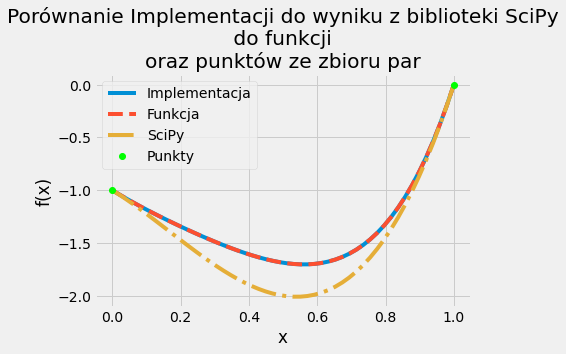

In [15]:
plt.style.use('fivethirtyeight')

plt.plot(interval, hermite(x_arr, y_arr, dx_arr))
plt.plot(interval, func(interval), linestyle='dashed')
plt.plot(interval, poly(interval), linestyle='dashdot')
plt.plot(x_arr, y_arr, "o", color="lime")
plt.title("Porównanie Implementacji do wyniku z biblioteki SciPy\n do funkcji \noraz punktów ze zbioru par")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend(["Implementacja", "Funkcja", "SciPy", "Punkty"])

Jak widzimy wyniki z funkcją pokrywają się w większości, lecz z implementacją z biblioteki SciPy już w mniejszym stopniu. Może to być spowodowane użyciem zmodyfikowanej metody interpolacyjnej wewnątrz biblioteki lub przyjmowaniem przez daną funkcję jedynie pierwszej pochodnej.